# Data Details - (5 Marks)

In [1]:
# Q. Import the useful Libraries from description (1 mark)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [31]:
# Q. Load the wine quality dataset and print the head. (1 mark)
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


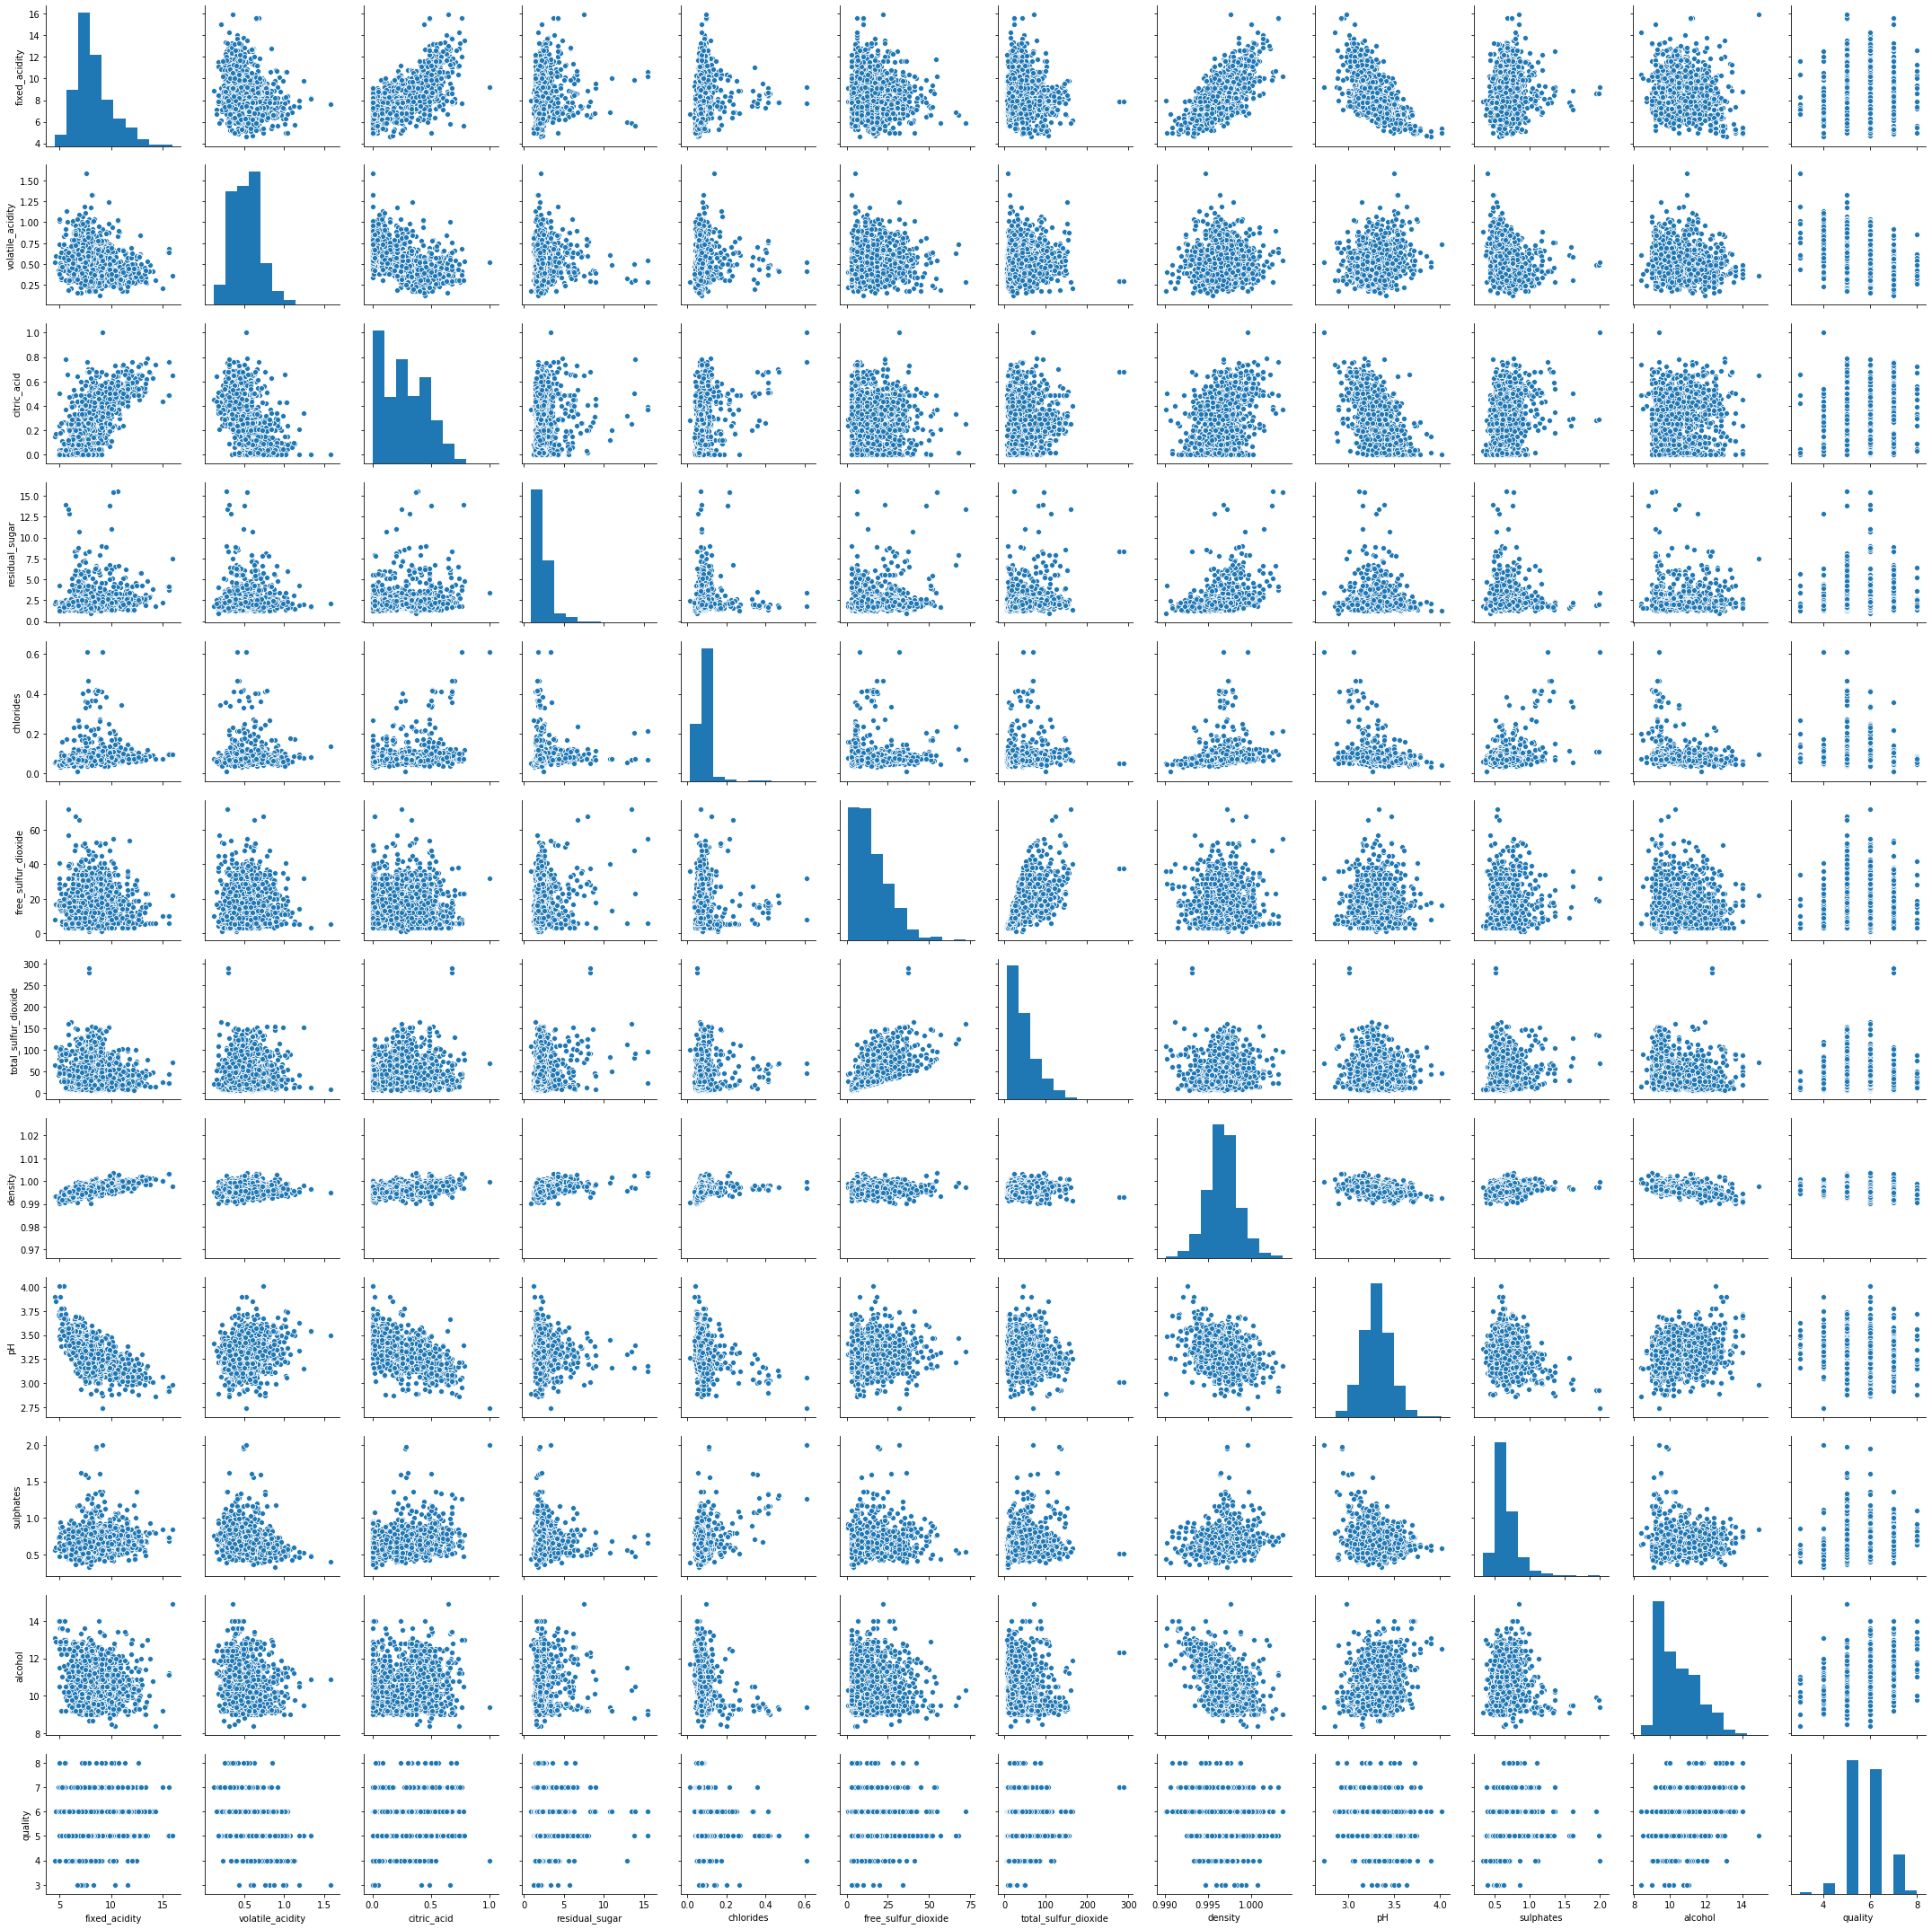

In [3]:
# Q. Count the value of Quality and perform pairplot. (1 mark)
print(df.quality.value_counts())
sns.pairplot(df)

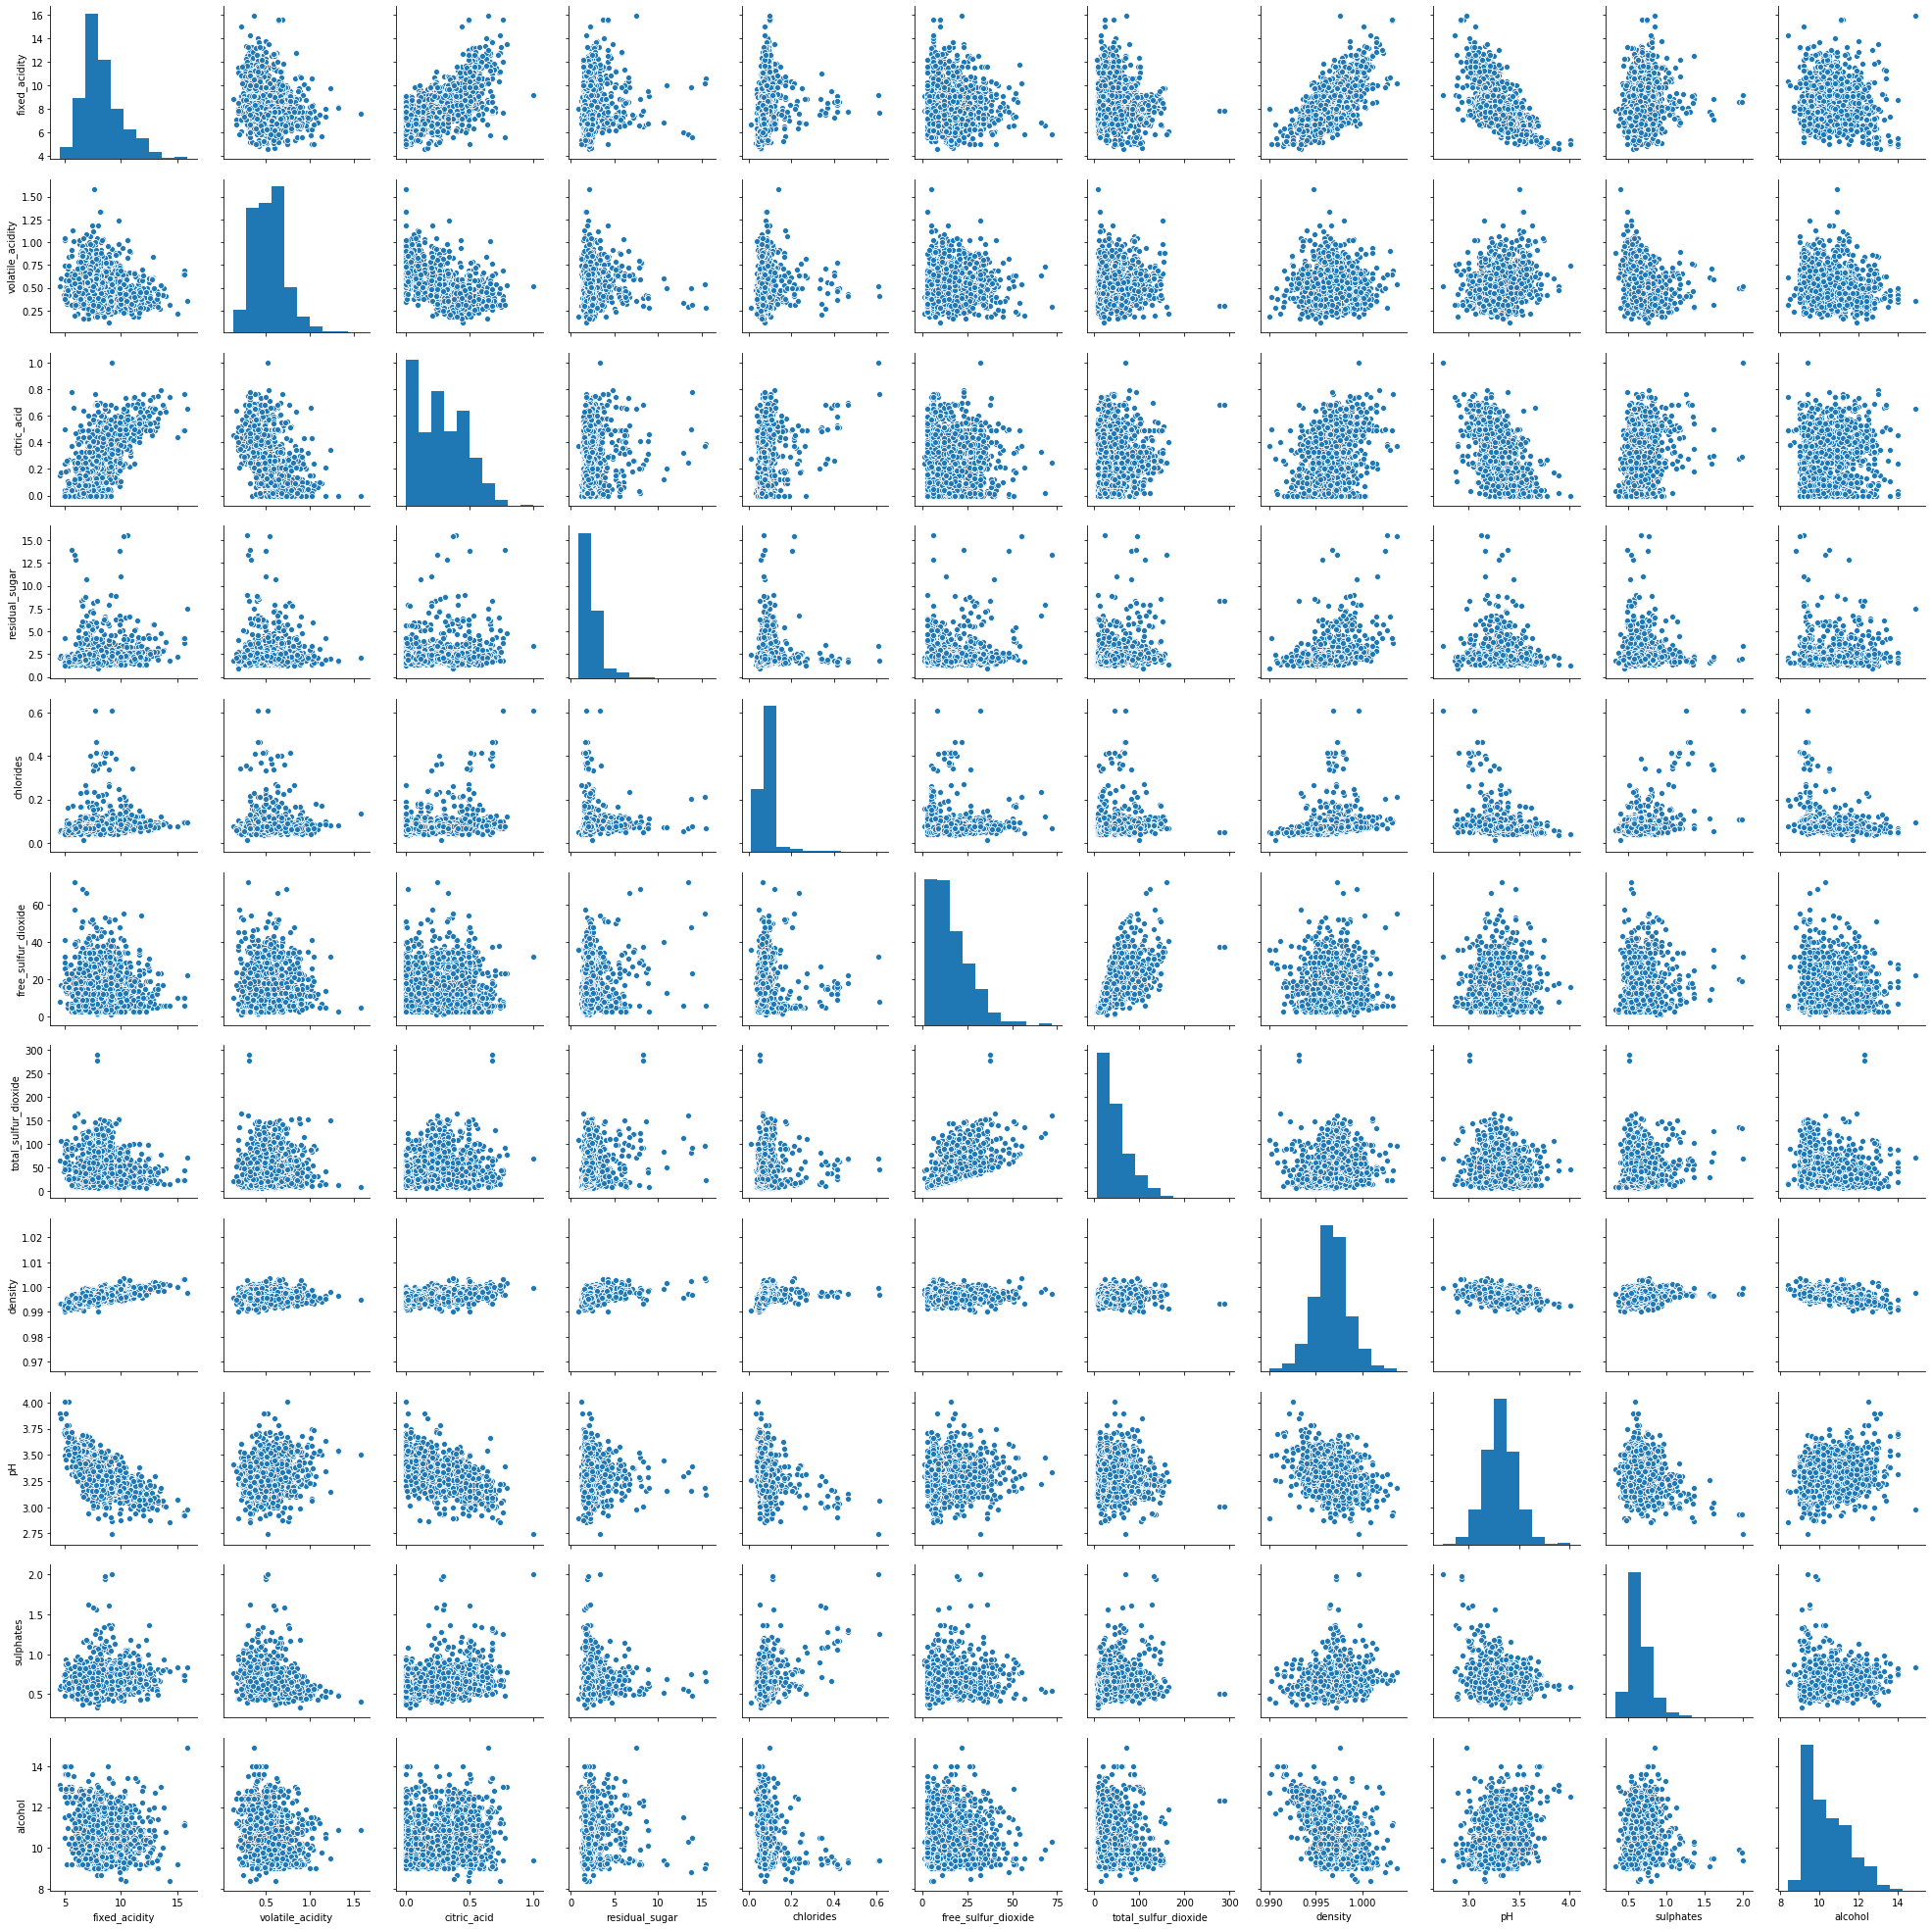

In [4]:
# Q. Drop Quality Feature From Dataset and perform pairplot. (1 mark)
new_df=df.drop('quality',axis=1)
sns.pairplot(new_df)

In [5]:
# Q. Scale the Dataset (apply z-score) (1 mark)
new_df=new_df.apply(zscore)
new_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# Perform Kmean  Clustering - (13 marks)

In [29]:
# Let us check optimal number of clusters-

# Q. Find suitable no of clusters for K means. (1 mark)
klist=[1,2,3,4,5,6,7,8,9]
scores=[]
for k in klist:
    model=KMeans(n_clusters=k)
    model.fit(new_df)
    score=model.inertia_
    scores.append(score)
print('from the below elbow plot we can say 2 no of clusters are suitable for this data set')
print('------------')

# Q. Capture the cluster lables. (1 mark)
model1=KMeans(n_clusters=2)
model.fit(new_df)
print("Cluster Labels are:" , model.labels_)
print('----------------')

# Q. Capture the centroids. (1 mark)
print("Centroids are:" , model.cluster_centers_)
print('---------')

# Q. Capture the intertia. (1 mark)
print("Inertia Value:" , model.inertia_)
print('---------')

# Q. Combine the cluster_range and cluster_errors into a dataframe and print it. (1 mark)
#index=np.arange(0,9)
df=pd.DataFrame(scores,columns=['cluster_errors'])
df1=pd.DataFrame(klist,columns=['cluster_range'])
df_total=pd.concat([df1,df],axis=1)
df_total

from the below elbow plot we can say 2 no of clusters are suitable for this data set
------------
Cluster Labels are: [5 8 5 ... 4 4 2]
----------------
Centroids are: [[ 3.90485549e-02 -1.22940367e-02 -1.48663780e-01 -3.02527640e-01
  -1.84347990e-02 -6.21098554e-01 -3.85415533e-01  2.10129930e-01
  -3.50721540e-01 -3.35838544e-01 -6.69917033e-01]
 [-2.09646407e-01 -6.37766791e-01  3.47957059e-01 -5.29234900e-02
  -1.73121957e-01  1.05509167e+00  5.93954261e-01  1.12030827e-01
   3.83931084e-01  4.22152214e-01 -9.46912638e-02]
 [ 1.16950615e-01 -1.02175446e+00  7.27925403e-01 -1.08170764e-01
  -2.85995020e-01 -4.83445491e-01 -6.51872910e-01 -8.19597222e-01
  -2.27975737e-01  2.51843612e-01  1.23208639e+00]
 [ 9.54162998e-02  2.19980305e-03  1.18155266e+00 -3.89872163e-01
   5.78475973e+00 -4.95156003e-02  5.10329601e-01  1.80071833e-01
  -1.73579154e+00  3.66341219e+00 -8.69731260e-01]
 [-1.20032731e+00  2.92254412e-01 -9.13357840e-01 -2.99817773e-01
  -4.67732404e-01  3.78330547e-01 

,cluster_range,cluster_errors
0,1,17589.000000
1,2,14330.119811
2,3,12629.974592
3,4,11294.328473
4,5,10155.362918
5,6,9364.680459
6,7,8645.355280
7,8,8299.460414
8,9,7967.025765


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

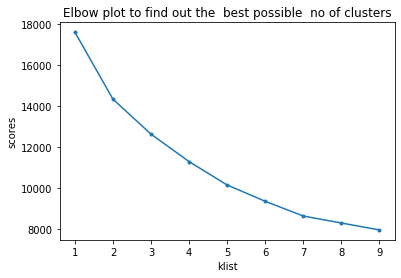

In [17]:
# Q. Perform the Elbow plot. (2 mark)
plt.plot(klist,scores,marker='.')
plt.title('Elbow plot to find out the  best possible  no of clusters')
plt.xlabel('klist')
plt.ylabel('scores') # As when we have plotted the elbow plot we can see a curve at no 2 cluster by this we can say that the 2 no clusters is best for this data set.
plt.show()


# Take Appropriate Cluster and Build a Kmean Cluster

In [18]:
# Q. Set number of clusters. (1 mark)
model=KMeans(n_clusters=2)

In [19]:
# Q. Fit the input data. (1 mark)
model.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# Q. Perfrom the Centroids and print it. (1 mark)
print(model.cluster_centers_)

[[ 0.92101516 -0.6363764   0.98544487  0.16102113  0.26425727 -0.23570616
  -0.21528505  0.49962261 -0.7079631   0.53163963  0.17310812]
 [-0.53855198  0.37211306 -0.57622644 -0.09415507 -0.1545211   0.1378262
   0.12588521 -0.29214801  0.41397248 -0.31086956 -0.10122278]]


# hint
kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [21]:
# Q. Create a new dataframe only for labels and convert it into categorical variable. (1 mark)
df_new=pd.DataFrame(model.labels_,columns=['WineType'])
df_new['WineType'][df_new['WineType']==0]='Red' # 0 = Red
df_new['WineType'][df_new['WineType']==1]='White' # 1 = White
df_new


,WineType
0,White
1,White
2,White
3,Red
4,White
...,...
1594,White
1595,White
1596,White
1597,White


In [32]:
# Q. Join the label dataframe with the Wine data frame to create s_df_labeled. Note: it could be appended to original dataframe. (1 mark)

s_df_labeled=pd.concat([df,df_new],axis=1)
s_df_labeled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,White
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,White
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,White
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,White


In [33]:
# Q. Groupby s_df_labeled and label data using Groupby function. (1 mark)
s_df_labeled.groupby(['WineType']).sum()
#wine_clusters = wine_data_attr.groupby(['clusters'])


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
WineType,,,,,,,,,,,,
Red,5854.4,244.205,273.10,1631.80,58.941,7912.0,23239.0,588.63671,1889.09,441.46,6258.366667,3478
White,7448.7,599.780,160.19,2427.75,80.918,17472.0,51063.0,1005.16123,3405.38,610.92,10407.983333,5534


# Use silhouette_Coefficient to Find best No of Cluster -(5 Marks)

From the below plot we can say that the best no of cluster is 2 because it is higher when compared to other clusters


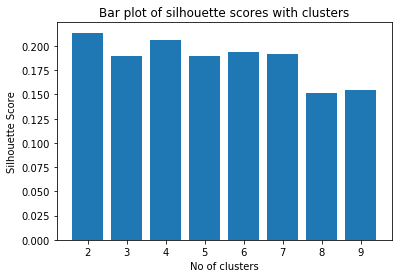

In [48]:
## Start code here
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusters=[2,3,4,5,6,7,8,9]
silhouettescores=[]
for c in clusters:
    KM=KMeans(n_clusters=c)
    KM.fit(new_df)
    value=KM.fit_predict(new_df)
    silhouettescore=silhouette_score(new_df,value)
    silhouettescores.append(silhouettescore)
plt.bar(clusters,silhouettescores)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.title('Bar plot of silhouette scores with clusters')
print('From the below plot we can say that the best no of cluster is 2 because it is higher when compared to other clusters')
    
## End code here

{'whiskers': [<matplotlib.lines.Line2D at 0x17f4dd5e4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17f4dd5ef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f4c541c48>],
 'medians': [<matplotlib.lines.Line2D at 0x17f4dd24b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f4dd24c88>],
 'means': [<matplotlib.lines.Line2D at 0x17f4dd24f08>]}

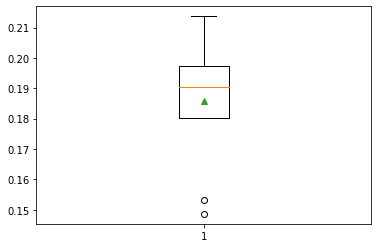

In [46]:
# Q. Show the final Boxplot (2 mark)
plt.boxplot(silhouettescores,showmeans=True)


# Build a Dendogram -(5 marks)

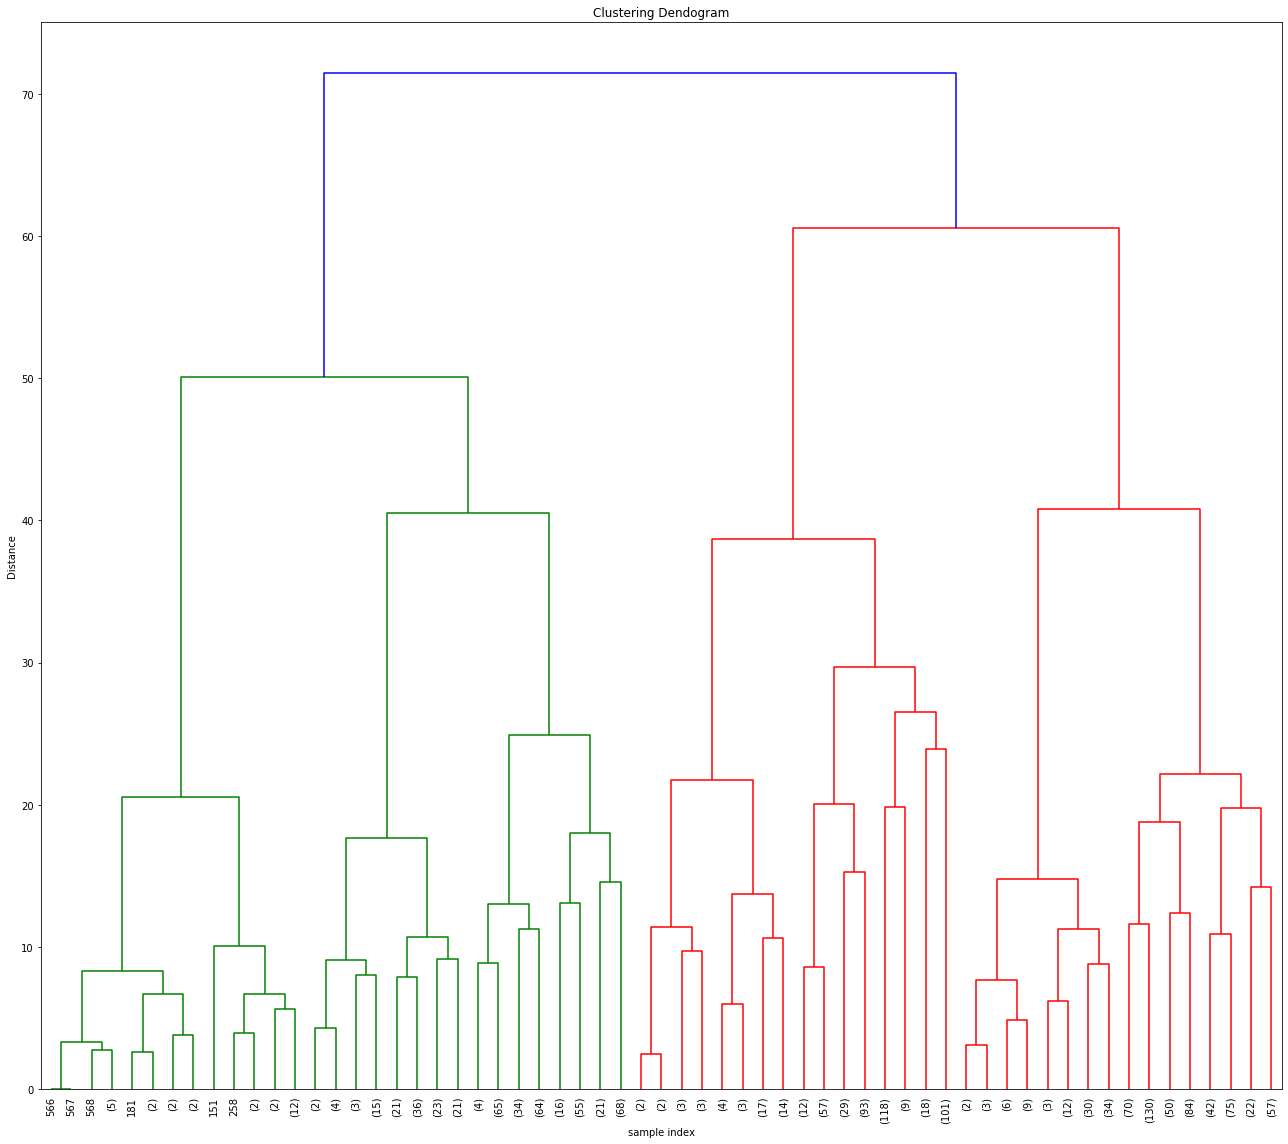

In [47]:
## Start code here
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(new_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## End code here

# END